In [2]:
import warnings
warnings.filterwarnings('ignore')

# pandas and numpy
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib qt

# sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#XGBoost
from xgboost import XGBClassifier
import xgboost as xgb

# stats and scipy
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
import scipy.stats as stats
!pip install mlxtend
#confusion matrix library
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
df = pd.read_csv('cleaned_data.csv')
df_dummy =  pd.read_csv('cleaned_dummified_data.csv')

In [3]:
#taking the target variable out 
x = df_dummy.drop(['PRIM_CONTRIBUTORY_CAUSE'], axis=1)
y = df_dummy['PRIM_CONTRIBUTORY_CAUSE']
df_dummy['PRIM_CONTRIBUTORY_CAUSE'].value_counts() 

0    228698
1     17588
2      5508
3      4350
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

In [4]:
#creating the test train split 
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=33)

In [5]:
#creating a list of models
models = []
#appending all the models in this list 
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))

In [6]:
#evaluate each model for accuracy
results = []
scoring = 'accuracy'
#a loop to run through the models in the list 
for name, model in models:
    #number of splits for each model 
    kfold = model_selection.KFold(n_splits=10)
    #gets score for each model 
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    #puts ther score in the results list 
    results.append(cv_results)
    #prints out the 
    msg = '%s: %0.4f (%0.4f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.8929 (0.0014)
LDA: 0.8763 (0.0018)
KNN: 0.8907 (0.0012)
RF: 0.8530 (0.0020)
[17:17:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:17:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:17:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the

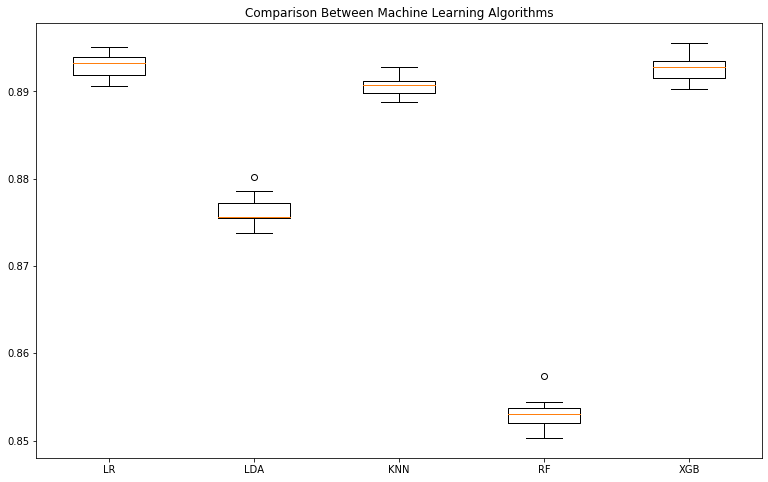

In [7]:
# boxplot algorithm comparison
names = ['LR','LDA','KNN','RF','XGB']
#makes a figure of box plots for the models
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
#puts the title on it 
ax.set_title('Comparison Between Machine Learning Algorithms')
#puts results from the top in the box plot 
plt.boxplot(results)
#sets lables
ax.set_xticklabels(names)
plt.show()

In [8]:
#CREATES A LOOP FOR THE PREDICT OF THE MODELS 
for name, model in models:
    #FITS FOR THE MODEL 
    model.fit(x_train, y_train)
    #PREDICTS 
    y_pred= model.predict(x_test)
    #PUTS THE ACURRACY SCCORE IN THE LIST 
    accuracy= accuracy_score(y_test, y_pred)
    #MAKES A CLASSIFICATION REPORT FOR THE MODELS 
    clf_report= classification_report(y_test, y_pred, digits=4)
    #PRINTS IT ALL OUT 
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.4f}")
    print(clf_report)
    print("\n")

The accuracy of model LogisticRegression is 0.8926
              precision    recall  f1-score   support

           0     0.8926    1.0000    0.9433     45729
           1     0.0000    0.0000    0.0000      3527
           2     0.0000    0.0000    0.0000      1094
           3     0.0000    0.0000    0.0000       879

    accuracy                         0.8926     51229
   macro avg     0.2232    0.2500    0.2358     51229
weighted avg     0.7968    0.8926    0.8420     51229



The accuracy of model LinearDiscriminantAnalysis is 0.8768
              precision    recall  f1-score   support

           0     0.9026    0.9676    0.9340     45729
           1     0.3107    0.1803    0.2282      3527
           2     0.1975    0.0283    0.0496      1094
           3     0.0000    0.0000    0.0000       879

    accuracy                         0.8768     51229
   macro avg     0.3527    0.2941    0.3029     51229
weighted avg     0.8313    0.8768    0.8505     51229



The accuracy of 

In [9]:
#CHOSE THE XGBOOST 
XGBmodel = XGBClassifier()
XGBmodel.fit(x_train, y_train)
y_predict = XGBmodel.predict(x_test)

[17:29:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


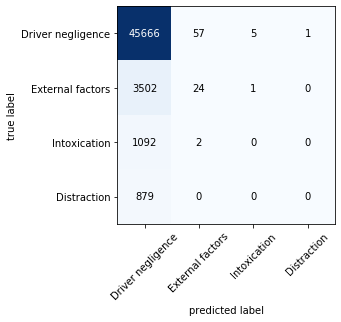

In [10]:
#MAKING A CONFUTION MATRIX 
cm = confusion_matrix(y_target=y_test, 
                      y_predicted=y_predict, 
                      binary=False)
#ADDING LABLES 
labels = ['Driver negligence','External factors','Intoxication','Distraction']
fig, ax = plot_confusion_matrix(conf_mat=cm)
ax.set_xticklabels([''] + labels,rotation=45)
ax.set_yticklabels([''] + labels)

plt.show()

In [11]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 

resampling = SMOTE()

# Define the pipeline, combine SMOTE with the XGB model
pipeline = Pipeline([('SMOTE', resampling), ('XGBoost', XGBmodel)])

[17:30:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost classification report:
               precision    recall  f1-score   support

           0     0.8950    0.9884    0.9394     45729
           1     0.3828    0.0278    0.0518      3527
           2     0.1000    0.0411    0.0583      1094
           3     0.0952    0.0023    0.0044       879

    accuracy                         0.8851     51229
   macro avg     0.3683    0.2649    0.2635     51229
weighted avg     0.8290    0.8851    0.8434     51229



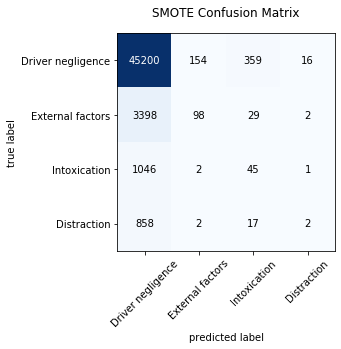

In [12]:
#SENDING TRAIN TEST WITH PIPLINE 
pipeline.fit(x_train, y_train) 
predicted_ = pipeline.predict(x_test)

# Obtain the results from the classification report and confusion matrix 
print('XGBoost classification report:\n', classification_report(y_test, predicted_, digits=4))
conf_mat = confusion_matrix(y_target=y_test, y_predicted=predicted_)
#PLOTTING ANOTHER CONFUTION MATRIX
fig, ax = plot_confusion_matrix(conf_mat=conf_mat)
ax.set_title('SMOTE Confusion Matrix')
ax.set_xticklabels([''] + labels,rotation=45)
ax.set_yticklabels([''] + labels)

plt.show()

In [16]:
#SETTINGH UP THE PARAMTERS FOR XGBOOST GRID SEARCH USING GPU 
param = {
    'colsample_bytree': [0.1, 0.5, 0.8, 1],
    'n_estimators': [25],
    'max_depth': [2, 5, 10, 20]}
param['tree_method'] = ['gpu_hist']
param['gpu_id'] = [0]
param['updater'] = ['grow_gpu_hist']
param['predictor'] = ['gpu_predictor']

#GRID SEARCH WITH XGBOOST 
grid_mse = GridSearchCV(estimator=XGBmodel, param_grid=param,
                        scoring='neg_mean_squared_error', cv=5, verbose=1)
grid_mse.fit(x, y)

# print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[18:10:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:81: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
[18:10:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:10:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:81: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For commo

[18:10:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:81: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
[18:10:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:10:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:81: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
[

[18:11:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:81: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
[18:11:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:11:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:81: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
[

[18:12:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:13:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:81: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
[18:13:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:13:34] WARNING: C:/Users/Admin

[18:13:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:81: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
[18:13:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:13:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:81: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
[

[18:17:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:81: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
[18:17:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:17:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:81: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
[

[18:19:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:20:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:81: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
[18:20:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:20:44] WARNING: C:/Users/Admin

AttributeError: 'GridSearchCV' object has no attribute 'plot_importance'